In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

In [2]:
def get_DLPFC_annotations(section_id):
    input_dir = os.path.join('dataset/DLPFC', section_id)
    adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
    Ann_df = pd.read_csv(os.path.join('dataset/DLPFC', section_id,'metadata.tsv'), sep='\t')
    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'layer_guess']
    print(adata)
    return adata

In [3]:
# DLPFC
s = '151507'
adata = get_DLPFC_annotations(s)
cluster = np.loadtxt("result/DLPFC/"+s+"/lambdaI0.8/2500__types.txt")
cluster = cluster[:, 1].astype(int).astype(str)
adata.obs['cluster'] = cluster
temp = adata[~adata.obs['Ground Truth'].isnull()]
temp
print("ARI: ",np.round(adjusted_rand_score(temp.obs['cluster'],temp.obs['Ground Truth']),3))
print("NMI: ",np.round(normalized_mutual_info_score(temp.obs['cluster'],temp.obs['Ground Truth']),3))

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
ARI:  0.598
NMI:  0.693


In [4]:
# Slide-seqV2 mouse hippocampus dataset
import anndata as ad
counts_file = 'dataset/MH/Puck_190921_21.digital_expression.txt'
coor_file = 'dataset/MH/Puck_190921_21_bead_locations.csv'
adata = sc.read_text(counts_file, delimiter='\t')
coor_df = pd.read_csv(coor_file, index_col=0)
adata = ad.AnnData(adata.X.T, var =adata.obs ,obs=adata.var)
adata.var_names_make_unique()
coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
adata

AnnData object with n_obs × n_vars = 20143 × 19653

In [5]:
adata.obsm["spatial"] = coor_df.to_numpy()
stDGCC = np.loadtxt("result/MH/lambdaI0.8/900__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)

<AxesSubplot:title={'center':' '}, xlabel='spatial1', ylabel='spatial2'>

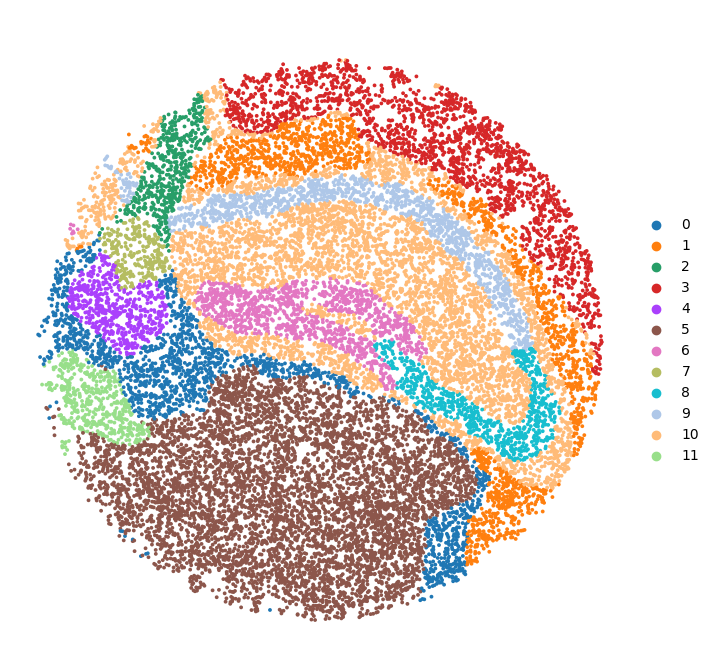

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
adata.obs['stDGCC'] = stDGCC
adata = adata[((adata.obsm['spatial'][:,0]-3200)**2 + (adata.obsm['spatial'][:,1]-3100)**2 < 2500**2)]
sc.pl.embedding(adata, basis="spatial", color="stDGCC",s=30, show=False, title=' ' ,frameon=False,colorbar_loc= None)

In [7]:
# Slide-seq mouse hippocampus dataset
count_file = 'dataset/MH1/MappedDGEForR.csv'
pos_file = 'dataset/MH1/BeadLocationsForR.csv'
adata = sc.read_csv(count_file)
adata = ad.AnnData(adata.X.T, var =adata.obs ,obs=adata.var)
coordinates = pd.read_csv(pos_file, index_col=0)
spatial = coordinates.loc[adata.obs_names, ['xcoord', 'ycoord']].to_numpy()
adata.var_names_make_unique()
adata.obsm['spatial'] = spatial
adata

AnnData object with n_obs × n_vars = 18508 × 17275
    obsm: 'spatial'

<AxesSubplot:title={'center':' '}, xlabel='spatial1', ylabel='spatial2'>

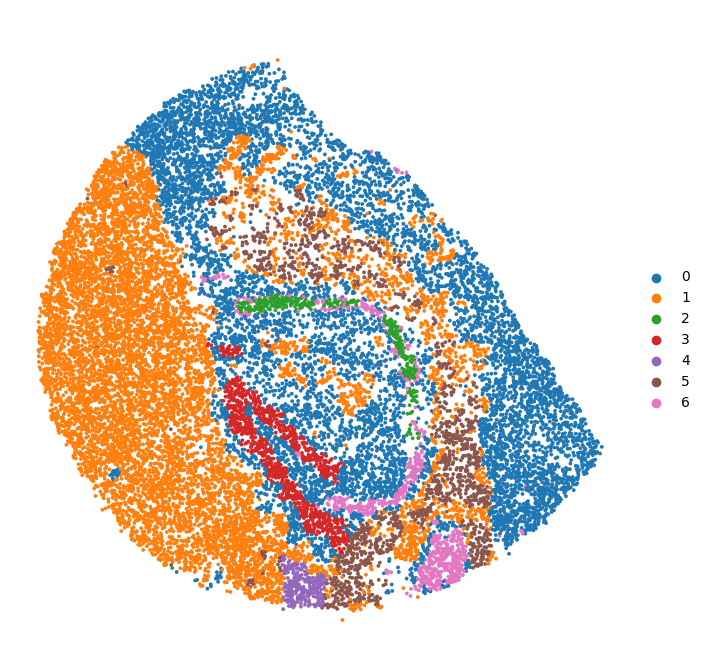

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
stDGCC = np.loadtxt("result/MH1/lambdaI0.8/900__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)
adata.obs['stDGCC'] = stDGCC
sc.pl.embedding(adata, 
                basis="spatial", color="stDGCC",s=30, show=False, title=' ' ,frameon=False,colorbar_loc= None
               )

In [9]:
# 10x mouse brain dataset
adata = sc.read_visium(path='dataset/MB', count_file='filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata = adata[(adata.obsm['spatial'][:,1]>2750) & (adata.obsm['spatial'][:,1]<5500) & (adata.obsm['spatial'][:,0]<6500)]

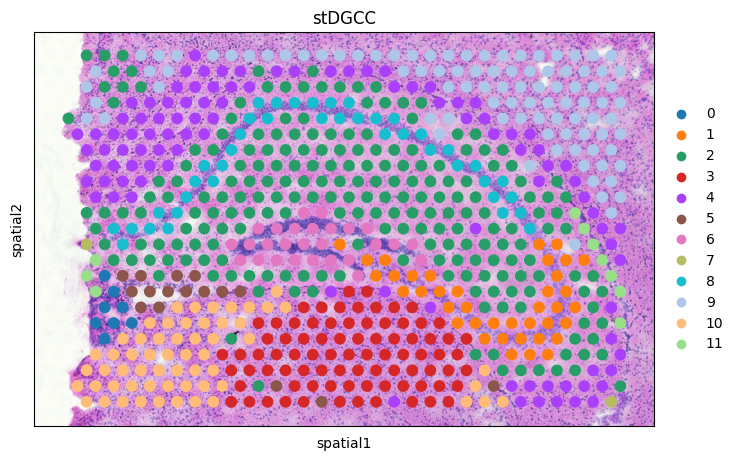

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
stDGCC = np.loadtxt("result/MB/lambdaI0.8/5000__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)
adata.obs['stDGCC'] = stDGCC
sc.pl.spatial(adata, color = 'stDGCC',img_key="hires")

In [11]:
# Xenium mouse brain dataset
adata = sc.read("dataset/Xenium/matrix.mtx.gz")
adata = adata.T
location = pd.read_csv("dataset/Xenium/cells.csv.gz")
location = location[['x_centroid','y_centroid']]
adata.obsm['spatial'] = location.to_numpy()
adata = adata[(adata.obsm['spatial'][:,0]>2000) & (adata.obsm['spatial'][:,0]<8000) & (adata.obsm['spatial'][:,1]>3000)]
adata

View of AnnData object with n_obs × n_vars = 72887 × 541
    obsm: 'spatial'

<AxesSubplot:title={'center':'stDGCC'}, xlabel='spatial1', ylabel='spatial2'>

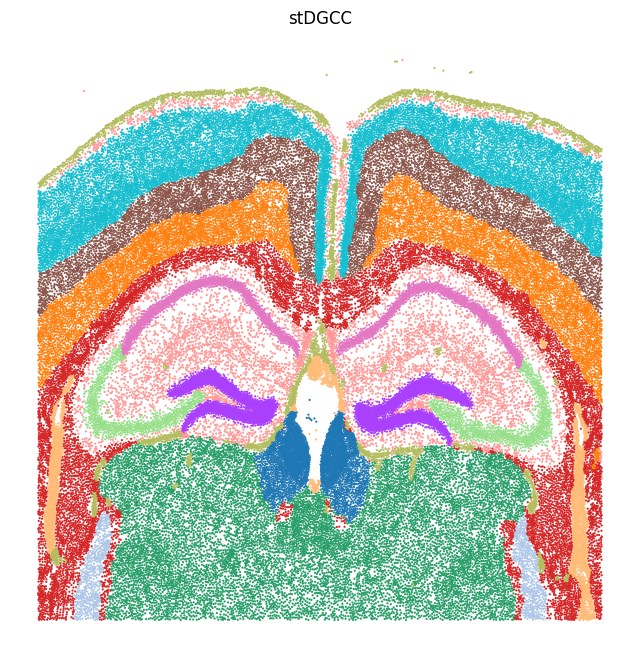

In [12]:
cluster = np.loadtxt("result/Xenium/lambdaI0.8/3000__types.txt")
cluster = cluster[:, 1].astype(int).astype(str)
adata.obs['stDGCC'] = cluster
sc.pl.embedding(adata, basis="spatial", color="stDGCC",
                s=10, show=False, title='stDGCC' ,legend_loc = None,
                frameon=False)

In [13]:
# CosMx mouse brain dataset
import pandas as pd
# 38987
exprMat = pd.read_csv("dataset/CosMX/Quarter Brain/Run5642_S3_Quarter_exprMat_file.csv")
metadata = pd.read_csv("dataset/CosMX/Quarter Brain/Run5642_S3_Quarter_metadata_file.csv")

exprMat['spots'] = exprMat['fov'].astype(str) + '_'+exprMat['cell_ID'].astype(str)
metadata['spots'] = metadata['fov'].astype(str) + '_'+metadata['cell_ID'].astype(str)
exprMat.set_index('spots', inplace=True)
metadata.set_index('spots', inplace=True)

location = metadata[['CenterX_global_px', 'CenterY_global_px']]
row_names = location.index.tolist()

count = exprMat
count =count.iloc[:, 2:]
count =count.iloc[:, :-10]
count = count.loc[row_names]


import anndata as ad
adata = ad.AnnData(count)
adata.obsm['spatial'] = location.to_numpy()
adata

AnnData object with n_obs × n_vars = 38996 × 950
    obsm: 'spatial'

<AxesSubplot:title={'center':'stDGCC'}, xlabel='spatial1', ylabel='spatial2'>

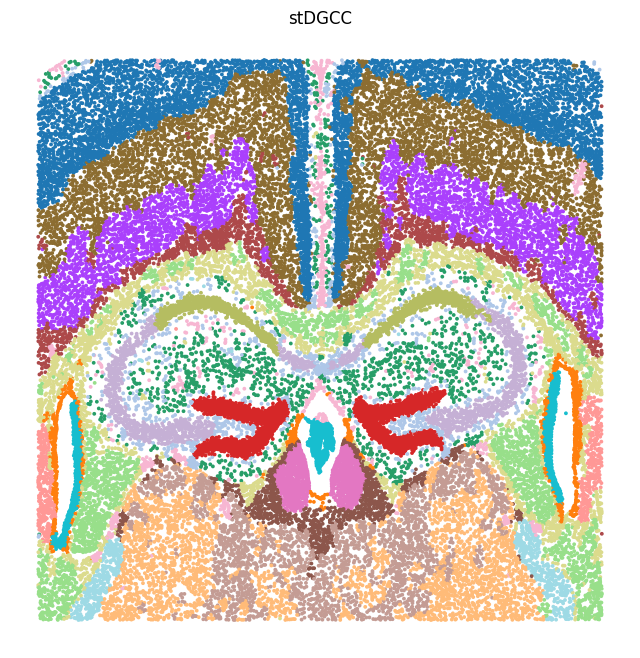

In [14]:
sc.pp.filter_cells(adata, min_counts=1)
stDGCC = np.loadtxt("result/CosMX/lambdaI0.8/3000__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)

dic = {'0': '0', 
       '1': '1', 
       '2': '14', 
       '3': '5',
       '4': '4',
       '5': '3',
       '6': '6',
       '7': '7',
       '8': '8', 
       '9': '9', 
       '10': '10', 
       '11': '11', 
       '12': '12',
       '13': '13', 
       '14': '2', 
       '15': '15', 
       '16': '16', 
       '17': '17', 
       '18': '18', 
       '19': '19'}
for i in range(adata.shape[0]):
    stDGCC[i] = dic[stDGCC[i]]


adata.obs['stDGCC'] = stDGCC
sc.pl.embedding(adata, basis="spatial", color="stDGCC",
                s=30, show=False, title='stDGCC' , 
                legend_loc = None,
                frameon=False)

In [15]:
# Vizgen MERFISH mouse brain dataset
import pandas as pd
countMat = pd.read_csv("dataset/MERFISH2/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate1_cell_by_gene_S2R1.csv", index_col=0)
metadata = pd.read_csv("dataset/MERFISH2/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate1_cell_metadata_S2R1.csv", index_col=0)
location = metadata.loc[countMat.index.tolist()][['center_x','center_y']]
import anndata as ad
adata = ad.AnnData(countMat)
adata.obsm['spatial'] = location.to_numpy()
adata.obsm['spatial'] = -adata.obsm['spatial']
adata = adata[:,0:483]
adata

View of AnnData object with n_obs × n_vars = 83546 × 483
    obsm: 'spatial'

<AxesSubplot:title={'center':'stDGCC'}, xlabel='spatial1', ylabel='spatial2'>

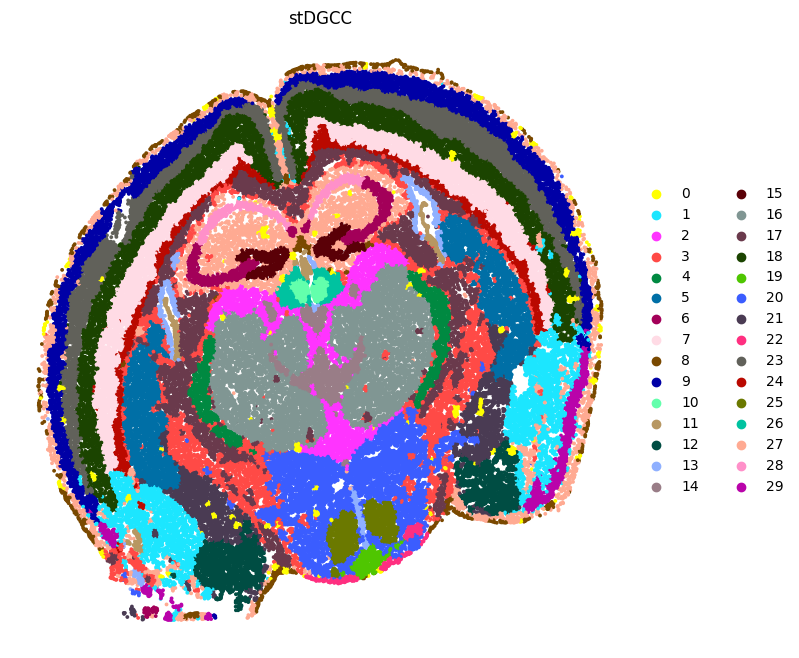

In [16]:
cluster = np.loadtxt("result/MERFISH2/lambdaI0.8/3000__types.txt")
cluster = cluster[:, 1].astype(int).astype(str)
adata.obs['stDGCC'] = cluster
sc.pl.embedding(adata, basis="spatial", color="stDGCC",
                s=30, show=False, title='stDGCC' ,
                frameon=False)